<a href="https://colab.research.google.com/github/annyfan/550/blob/master/notebookc80a383385.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Imports
import os
import tensorflow as tf
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

# Metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
import sys

In [6]:
!wget "https://www.dropbox.com/s/qvo45vf0kc7j41d/ift6758-a20.zip?dl=0" -O data.zip


--2020-12-11 15:03:03--  https://www.dropbox.com/s/qvo45vf0kc7j41d/ift6758-a20.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/qvo45vf0kc7j41d/ift6758-a20.zip [following]
--2020-12-11 15:03:04--  https://www.dropbox.com/s/raw/qvo45vf0kc7j41d/ift6758-a20.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb10185d51f53d59d7d13fa9cfd.dl.dropboxusercontent.com/cd/0/inline/BE0tuOVlkmHkSTqiwoNQl6dHpz50Gcg11UE2lnp2WB3yWGdpXfXs1gj9Sd66dDYFjjHx35Ce1C87l8xHsdpP2uj-jfLB9nJUndvHbvgUPAtz1WC6IhyTvsEvi_eYqS5FEo4/file# [following]
--2020-12-11 15:03:04--  https://ucb10185d51f53d59d7d13fa9cfd.dl.dropboxusercontent.com/cd/0/inline/BE0tuOVlkmHkSTqiwoNQl6dHpz50Gcg11UE2lnp2WB3yWGdpXfXs1gj9Sd66dDYFjjHx35Ce1C87l8xHsdpP2uj-jfLB9n

In [7]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_profile_images/profile_images_train/9O6PO4HFOCQ99IHF.png  
  inflating: train_profile_images/profile_images_train/9OGBOKM836P9MHMF.png  
  inflating: train_profile_images/profile_images_train/9OI7OC6A872QJPSH.png  
  inflating: train_profile_images/profile_images_train/9OI8I76J9K28EKQH.png  
  inflating: train_profile_images/profile_images_train/9OPJABRP2617QS4D.png  
  inflating: train_profile_images/profile_images_train/9OT5062HK84PG4N3.png  
  inflating: train_profile_images/profile_images_train/9P0LPSH2KE7K544O.png  
  inflating: train_profile_images/profile_images_train/9P0NH81RQ8CH2ML4.png  
  inflating: train_profile_images/profile_images_train/9P38G80NSFA7KDK6.png  
  inflating: train_profile_images/profile_images_train/9P4FRH3ICREEQL1D.png  
  inflating: train_profile_images/profile_images_train/9PAC0AE37SGQATON.png  
  inflating: train_profile_images/profile_images_train/9PFJD24I7OT7LRS0.png  
  inflating: 

In [8]:
#Visualize the count of number of survivors
sns.set()

In [9]:
# Set random seeds (for reproducibility requirement)
os.environ['PYTHONHASHSEED']=str(1)
tf.random.set_seed(67)
np.random.seed(67)
random.seed(67)

In [238]:
# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')




In [232]:
train_df.isnull().sum()

Id                                                0
User Name                                         0
Personal URL                                   4244
Profile Cover Image Status                       90
Profile Verification Status                       0
Profile Text Color                               66
Profile Page Color                               78
Profile Theme Color                              72
Is Profile View Size Customized?                  0
UTC Offset                                      486
Location                                       1461
Location Public Visibility                        0
User Language                                     0
Profile Creation Timestamp                        0
User Time Zone                                  486
Num of Followers                                  0
Num of People Following                           0
Num of Status Updates                             0
Num of Direct Messages                            0
Profile Cate

In [233]:
train_df.loc[train_df['Num of Profile Likes'].idxmax()]

Id                                                           D8E23RLRSGIEHRO6
User Name                                                      lLvSEsGhtaCNaf
Personal URL                                      https://blob/vrpslktps6.com
Profile Cover Image Status                                                Set
Profile Verification Status                                          Verified
Profile Text Color                                                     f58ea8
Profile Page Color                                                     ddeef6
Profile Theme Color                                                    ffffff
Is Profile View Size Customized?                                        False
UTC Offset                                                              10800
Location                                                       Moscow, Russia
Location Public Visibility                                            Enabled
User Language                                                   

In [234]:

# get the number of seconds to the unix epoch start.
df_unix_sec = pd.to_datetime(train_df['Profile Creation Timestamp']).astype(int)/ 10**9

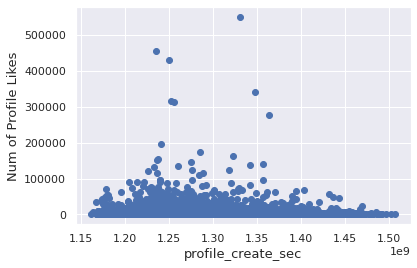

In [235]:
fig, ax = plt.subplots()
ax.scatter(x = df_unix_sec, y = train_df['Num of Profile Likes'])
plt.ylabel('Num of Profile Likes', fontsize=13)
plt.xlabel('profile_create_sec', fontsize=13)
plt.show()



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


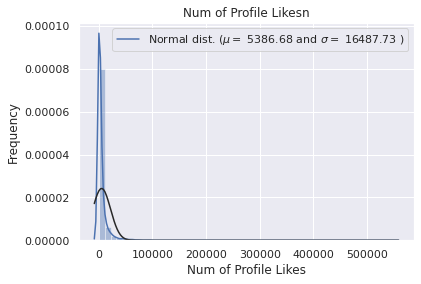

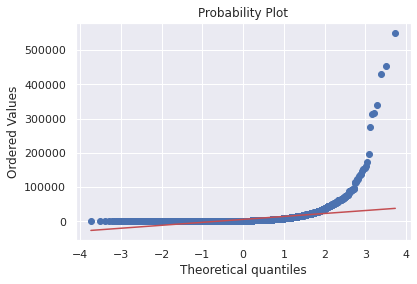

In [239]:
# Num of Profile Likes分布图
from scipy.stats import norm
from scipy import stats
sns.distplot(train_df['Num of Profile Likes'] , fit=norm)
# SalePrice均值、均方差
(mu, sigma) = norm.fit(train_df['Num of Profile Likes'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.title('Num of Profile Likesn')

# QQ-plot（验证某两组数据是否来自同一分布，离的距离）
fig = plt.figure()
res = stats.probplot(train_df['Num of Profile Likes'], plot=plt)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


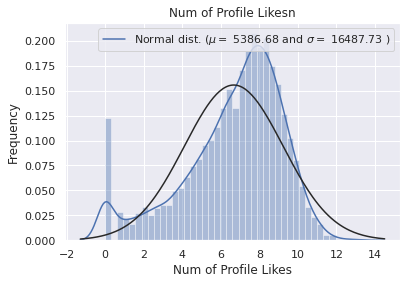

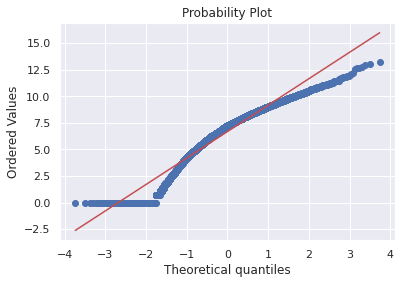

In [242]:
# Num of Profile Likes分布图
from scipy.stats import norm
from scipy import stats
sns.distplot(np.log(train_df['Num of Profile Likes'] +1), fit=norm)
# SalePrice均值、均方差
(mu, sigma) = norm.fit(train_df['Num of Profile Likes'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.title('Num of Profile Likesn')

# QQ-plot（验证某两组数据是否来自同一分布，离的距离）
fig = plt.figure()
res = stats.probplot(np.log(train_df['Num of Profile Likes']+1), plot=plt)
plt.show()

In [246]:
train_df = train_df[train_df['Num of Profile Likes']>0]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


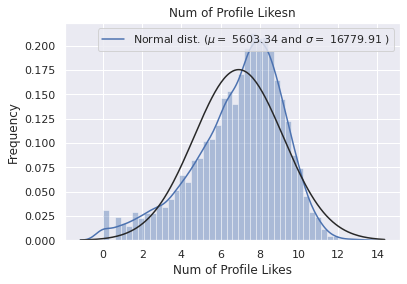

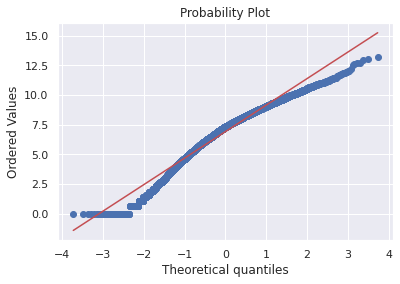

In [244]:
# Num of Profile Likes分布图
from scipy.stats import norm
from scipy import stats
sns.distplot(np.log(like_train['Num of Profile Likes']), fit=norm)
# SalePrice均值、均方差
(mu, sigma) = norm.fit(train_df['Num of Profile Likes'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.title('Num of Profile Likesn')

# QQ-plot（验证某两组数据是否来自同一分布，离的距离）
fig = plt.figure()
res = stats.probplot(np.log(like_train['Num of Profile Likes']), plot=plt)
plt.show()

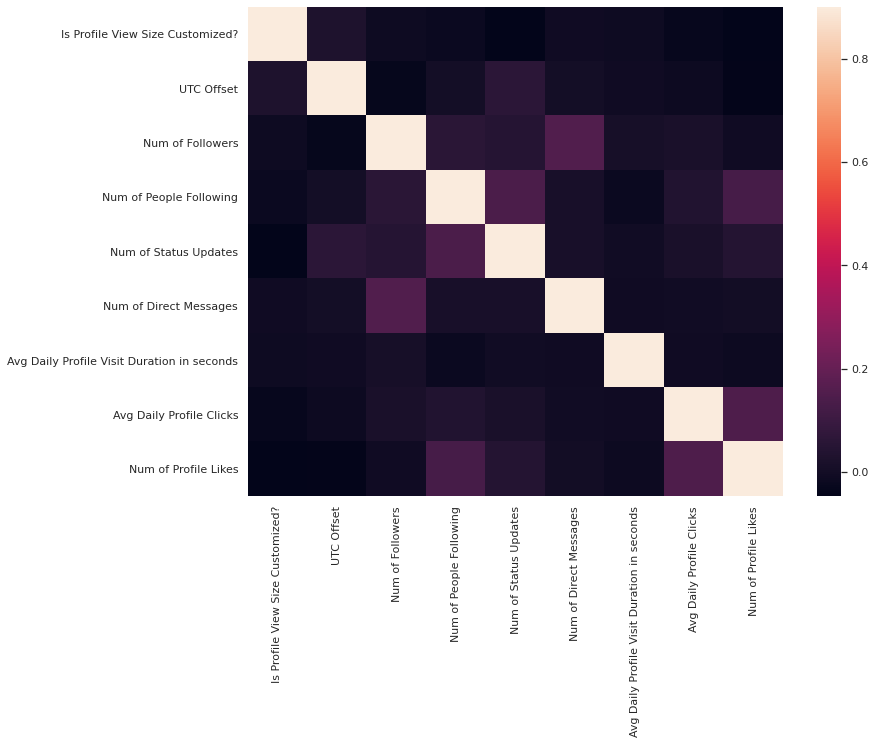

In [247]:
# 两文件数据量

ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y_train = train_df['Num of Profile Likes'].values
# 连接两个表，将两个表的数据共同处理
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
# 去掉目标变量SalePrice列
#all_data.drop(['Num of Profile Likes'], axis=1, inplace=True)
#查看各变量与预测目标相关性，按照右边颜色条进行判断

corrmat = train_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9)
plt.show()

In [248]:
# 查看各变量缺失率及降序排序
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print("missing_data:", missing_data.head(20)) # 列出前20个

# 填补缺失值，None\0\众数\中位数\指定值填充，或者去掉该列


missing_data:                                              Missing Ratio
Personal URL                                     58.125644
Location                                         18.980433
User Time Zone                                    6.076210
UTC Offset                                        6.076210
Profile Cover Image Status                        1.091658
Profile Page Color                                1.071061
Avg Daily Profile Clicks                          1.040165
Avg Daily Profile Visit Duration in seconds       1.029866
Profile Text Color                                1.029866
Profile Theme Color                               0.937178


In [249]:
from scipy.stats import skew
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# 列出数据的偏斜度，降序排序
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
print("skew:",skewness.head(10))



Skew in numerical features: 

skew:                                                   Skew
Num of Direct Messages                       91.643092
Num of Status Updates                        21.113899
Num of Followers                             15.748003
Num of People Following                      11.976475
Is Profile View Size Customized?              2.860706
Avg Daily Profile Clicks                      1.866166
UTC Offset                                    0.657441
Avg Daily Profile Visit Duration in seconds   0.032626


In [250]:

# 将偏斜度大于0.5的数值列做一个log转换，使之尽量符合正态分布，因为很多模型的假设数据服从正态分布
skewness = skewness[abs(skewness.Skew) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
print("LabelEncoder：all_data.shape:", all_data.shape)

There are 6 skewed numerical features to Box Cox transform
LabelEncoder：all_data.shape: (9710, 23)


In [ ]:
# Finalizing all the pre-processing steps we have seen above.
def pre_process(data):

  data.loc[data['Personal URL'].notnull(), 'URL']=1
  data.loc[data['Personal URL'].isnull(), 'URL']=0
    
  data['Profile Cover Image Status'] = data['Profile Cover Image Status'].fillna('Not Set').replace(['Set', 'Not set', 'Not Set'], [1., 0., 0.])

  data['Profile Verification Status'] = data['Profile Verification Status'].fillna('0').replace(['Not verified', 'Pending','Verified'], [0.,1., 2.])
    
  data['Profile Category'] = data['Profile Category'].replace(['business', 'celebrity','government', 'unknown'], [1., 2., 3., 0.])

  data['Avg Daily Profile Clicks'] = data['Avg Daily Profile Clicks'].fillna(0.)
    
  data['Avg Daily Profile Visit Duration in seconds'] = data['Avg Daily Profile Visit Duration in seconds'].fillna(0.)

  data['Profile Text Color'] = data['Profile Text Color'].fillna('000000')
  data['Profile Page Color'] = data['Profile Page Color'].fillna('FFFFFF')
  data['Profile Theme Color'] = data['Profile Theme Color'].fillna('FFFFFF')
    
  data['UTC Offset'] = data['UTC Offset'].fillna('0')
  data['Location'] = data['Location'].fillna('unknown')
  data['Location Public Visibility'] = data['Location Public Visibility'].replace(['Disabled', 'Enabled', 'enabled', 'disabled', '??', ' '], [0., 1., 1., 0., 0., 0.])
  data['User Time Zone'] = data['User Time Zone'].fillna('unknown')
  '''
  Color: Convert 16-digit Hex Code to 0-255, Separate Columns RR-GG-BB, then will have numeric features
  Profile Creation Timestamp: convert to long numeric (the year matters)'''

  data['profile_text_r'] = data['Profile Text Color'].str[:2].apply(lambda x: int(x, 16))
  data['profile_text_g'] = data['Profile Text Color'].str[2:4].apply(lambda x: int(x, 16))
  data['profile_text_b'] = data['Profile Text Color'].str[4:].apply(lambda x: int(x, 16))

  data['profile_page_r'] = data['Profile Page Color'].str[:2].apply(lambda x: int(x, 16))
  data['profile_page_g'] = data['Profile Page Color'].str[2:4].apply(lambda x: int(x, 16))
  data['profile_page_b'] = data['Profile Page Color'].str[4:].apply(lambda x: int(x, 16))

  data['profile_theme_r'] = data['Profile Theme Color'].str[:2].apply(lambda x: int(x, 16))
  data['profile_theme_g'] = data['Profile Theme Color'].str[2:4].apply(lambda x: int(x, 16))
  data['profile_theme_b'] = data['Profile Theme Color'].str[4:].apply(lambda x: int(x, 16))

  data['profile_create_sec'] = pd.to_datetime(data['Profile Creation Timestamp']).astype(int)/ 10**9

  data['Profile Category'] = data['Profile Category'].replace([' '], [4.])

  data['User Time Zone'] = LabelEncoder().fit_transform(data['User Time Zone'])
  data['User Language'] = LabelEncoder().fit_transform(data['User Language'])

  return data

# 数据预处理完成后的总训练集、预测集
train = all_data[:ntrain]
test = all_data[ntrain:]

train_df_p = pre_process(train)
test_df_p = pre_process(test) 


In [253]:
train_df_p = train_df_p.drop(columns=['Personal URL','User Name', 'Id', 'Profile Text Color', 'Profile Page Color','Profile Theme Color', 'Location', 
                         'Profile Creation Timestamp', 'Profile Image'])
test_df_p = test_df_p.drop(columns=['Personal URL','User Name', 'Id', 'Profile Text Color', 'Profile Page Color','Profile Theme Color', 'Location', 
                         'Profile Creation Timestamp', 'Profile Image'])

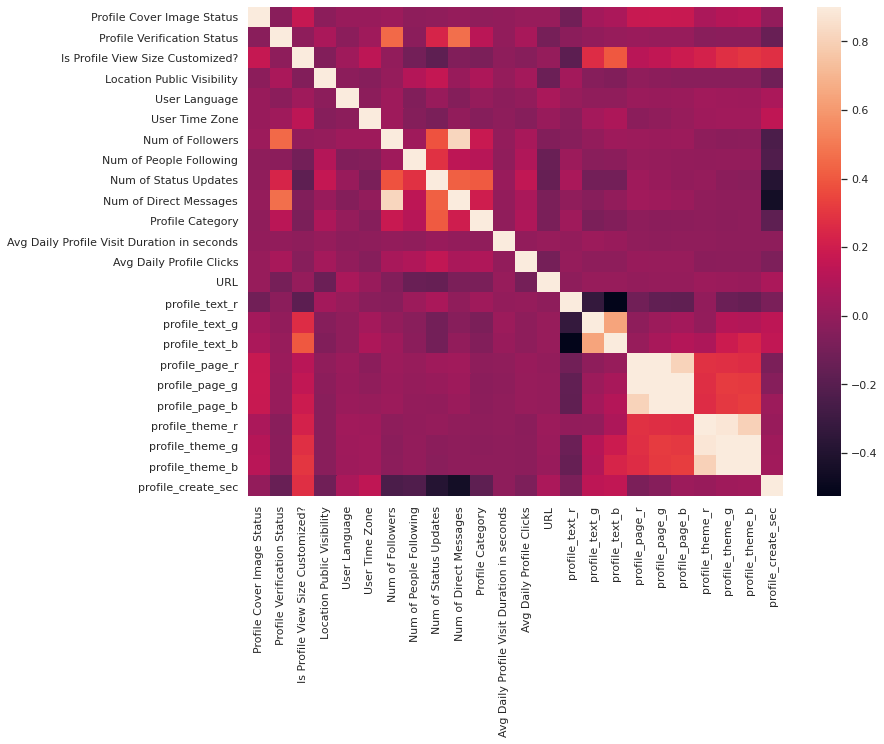

In [254]:
corrmat = train_df_p.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9)
plt.show()

In [269]:

cols_x = ['URL',
          'Profile Cover Image Status',
          'Profile Verification Status',
          'Is Profile View Size Customized?',
          'Location Public Visibility', 
          'User Language', 
          'profile_create_sec', 
          'Num of Followers', 
          'Num of People Following', 
          'Num of Status Updates', 
          'Num of Direct Messages',
          'Profile Category',
          'Avg Daily Profile Visit Duration in seconds', 
          'Avg Daily Profile Clicks', 
          'profile_text_r', 
          'profile_text_g', 
          'profile_text_b', 
          'profile_page_r', 
          'profile_page_g', 
          'profile_page_b', 
          'profile_theme_r', 
          'profile_theme_g', 
          'profile_theme_b' 
          ]
cols_y = 'Num of Profile Likes'

In [131]:
# frequency encoding
# Color: Frequency Encoding (~1900 colors, they have different encodings)
# User Time Zone: frequency encoding (duplicate feature with UTC-offset)
# User Language: frequency encoding (28 unique)
def trans_freq(x_freq,x_freq_col):
  for name in x_freq.columns:
    if name in x_freq_col:
      fe = x_freq.groupby(name).size()/len(x_freq)
      x_freq.loc[:, name] = x_freq[name].map(fe)
    
  return x_freq 

In [270]:

x = train_df_p[cols_x]
y = train_df[cols_y]


# split dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True, random_state=76) #  To guarantee that the split will always be the same 

#one hot encoding + log transformation
X_train_dum = pd.get_dummies(X_train)
X_test_dum = pd.get_dummies(X_test)

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

freq_col = [
            #'profile_text_r', 
            #'profile_text_g', 
            #'profile_text_b', 
            #'profile_page_r', 
            #'profile_page_g', 
            #'profile_page_b', 
            #'profile_theme_r', 
            #'profile_theme_g', 
            #'profile_theme_b', 
            #'profile_create_sec',
            #'Num of Followers',                          
            #'Num of People Following'   ,                      
            #'Num of Status Updates'   ,                         
            #'Num of Direct Messages'  ,                                
            ##'Avg Daily Profile Visit Duration in seconds',     
            #'Avg Daily Profile Clicks',
            'profile_create_sec'
            ]

# frequency encoding
X_train_freq= trans_freq(X_train.copy(), freq_col)
X_test_freq= trans_freq(X_test.copy(), freq_col)

#再整理出一组标准化的数据，通过对比可以看出模型的效果有没有提高
from sklearn.preprocessing import MaxAbsScaler
scale_x=QuantileTransformer(n_quantiles=10, random_state=67)
#x1=scale_x.fit_transform(x)
#scale_y=StandardScaler()
#y=np.array(y).reshape(-1,1)
#y1=scale_y.fit_transform(y)
#y1=y1.ravel()
X_train1= scale_x.fit_transform(X_train)
X_test1 = scale_x.fit_transform(X_test)
#y_train1 = scale_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
#y_test1 = scale_y.fit_transform(np.array(y_test).reshape(-1,1)).ravel()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
pca = KernelPCA( svd_solver='full')
pca.fit(X_train)
print(pca.explained_variance_ratio_)

PCA not better #poly 7.11, PCA 6.39

In [ ]:
pca = KernelPCA( kernel='rbf') #poly 7.11, PCA 6.39
reduced_data = pca.fit_transform(X_train)
r2 = RandomForestRegressor(n_estimators=100,random_state=67)
r2 = r2.fit(reduced_data,y_train)
regression.append("RandomForestRegressor")

print(mean_squared_log_error(y_test, r2.predict(pca.transform(X_test))))

In [126]:
result = pd.DataFrame(columns = ("Regression","Training","Testing"))
regression, train_scores, test_scores = [],[],[]

In [271]:
r2 = RandomForestRegressor(n_estimators=100,random_state=67)
r2 = r2.fit(X_train,y_train_log)
regression.append("RandomForestRegressor")
ypred = r2.predict(X_test)
ypred_original=np.exp(ypred)
print(mean_squared_log_error(y_test, ypred_original))

2.704949409857735


In [272]:
r2 = r2.fit(X_train_dum,y_train_log)
ypred = r2.predict(X_test_dum)
ypred_original=np.exp(ypred)
ypred_original = np.around(np.maximum(ypred_original, 0))

print(mean_squared_log_error(y_test,ypred_original))

r2 = r2.fit(X_train_freq,y_train_log)
ypred = r2.predict(X_test_freq)
ypred_original=np.exp(ypred) 
ypred_original = np.around(np.maximum(ypred_original, 0))

print(mean_squared_log_error(y_test,ypred_original))

r2 = r2.fit(X_train1,y_train_log)
ypred = r2.predict(X_test1)
ypred_original=np.exp(ypred)
ypred_original = np.around(np.maximum(ypred_original, 0))

print(mean_squared_log_error( y_test, ypred_original))


2.7045707367576375
2.719995750945171
2.759965431380942


In [273]:
  models=[LinearRegression(),
          KNeighborsRegressor(),
          SVR(),
          Ridge(),
          Lasso(),
          MLPRegressor(hidden_layer_sizes=(6, 4, 2,2),  activation='relu', solver='lbfgs', alpha=200, batch_size='auto',learning_rate='adaptive', learning_rate_init=0.0001, power_t=0.8, max_iter=5000, shuffle=True,random_state=67, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,early_stopping=True,beta_1=0.9, beta_2=0.9, epsilon=1e-08),
          DecisionTreeRegressor(),
          ExtraTreeRegressor(),
          RandomForestRegressor(n_estimators=100,random_state=67),
          AdaBoostRegressor(),
          GradientBoostingRegressor(),
          BaggingRegressor(n_estimators=100) ,
          XGBRegressor()
          ]
  models_str=['LinearRegression','KNNRegressor','SVR','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','RandomForest','AdaBoost','GradientBoost','Bagging',]
  score_adapt=[]
  for name,model in zip(models_str,models):

    try:
          print('---------------------------------')
          #if name in ['LinearRegression','Ridge','ExtraTree']:   
          print('开始训练模型：'+name+' 平滑处理')
          model=model
          model.fit(X_train_dum,y_train_log)
          y_pred_log=model.predict(X_test_dum)   
          ypred_original=np.exp(y_pred_log) 
          ypred_original = np.around(np.maximum(ypred_original, 0))
          score=model.score(X_test_dum,y_test_log)
          score_adapt.append(str(score)[:5])
          print(name +' msle:',mean_squared_log_error(y_test, ypred_original))
    except:
          print(print("Unexpected error:", sys.exc_info()[0]))
    try:
          print('---------------------------------')  
          #elif name in ['SVR','MLPRegressor','Bagging','AdaBoost','KNNRegressor']:
          print('开始训练模型：'+name+' 标准化处理')
              
          model.fit(X_train1,y_train_log)
          y_pred1=model.predict(X_test1)
          ypred_original=np.exp(y_pred1) 
          #ypred_original=scale_y.inverse_transform(y_pred1.reshape(-1, 1)).ravel()
          ypred_original = np.around(np.maximum(ypred_original, 0))
          score=model.score(X_test1,y_test1)
          score_adapt.append(str(score)[:5])       
          
          print(name +' msle:',(mean_squared_log_error(y_test, ypred_original)))

    except:
          print(print("Unexpected error:", sys.exc_info()[0]))
    try:  
          print('---------------------------------')      
          print('开始训练模型：'+name+' 频率')
         
          model.fit(X_train_freq,y_train_log)
          y_pred_log=model.predict(X_test_freq)
          ypred_original=np.exp(y_pred_log) 
          ypred_original = np.around(np.maximum(ypred_original, 0))
          score_adapt.append(str(score)[:5])    
          print(name +' msle:'+str(mean_squared_log_error(y_test, ypred_original)))

         
    except:
          print(print("Unexpected error:", sys.exc_info()[0]))
    try:    
          print('---------------------------------') 
          print('开始训练模型：'+name+' 普通')
         
          model.fit(X_train,y_train)
          y_pred = model.predict(X_test)
          y_pred = np.around(np.maximum(y_pred, 0))
          score=model.score(X_test,y_test)
          score_adapt.append(str(score)[:5])   
          print(name +' msle:'+str(mean_squared_log_error(y_test, y_pred)))

          print('---------------------------------')
    except:
          print(print("Unexpected error:", sys.exc_info()[0]))

---------------------------------
开始训练模型：LinearRegression 平滑处理
LinearRegression msle: 3.092671482827507
---------------------------------
开始训练模型：LinearRegression 标准化处理
Unexpected error: <class 'ValueError'>
None
---------------------------------
开始训练模型：LinearRegression 频率
LinearRegression msle:3.094730039439707
---------------------------------
开始训练模型：LinearRegression 普通
LinearRegression msle:7.494265995227434
---------------------------------
---------------------------------
开始训练模型：KNNRegressor 平滑处理
KNNRegressor msle: 5.451712128708891
---------------------------------
开始训练模型：KNNRegressor 标准化处理
Unexpected error: <class 'ValueError'>
None
---------------------------------
开始训练模型：KNNRegressor 频率
KNNRegressor msle:5.286274662322619
---------------------------------
开始训练模型：KNNRegressor 普通
KNNRegressor msle:6.950188489495186
---------------------------------
---------------------------------
开始训练模型：SVR 平滑处理
SVR msle: 4.987354402701752
---------------------------------
开始训练模型：SVR 标准化处理
Une

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.18285e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.18285e-18): result may not be accurate.
  overwrite_a=True).T



---------------------------------
开始训练模型：MLPRegressor 标准化处理
Unexpected error: <class 'ValueError'>
None
---------------------------------
开始训练模型：MLPRegressor 频率
MLPRegressor msle:4.94779837417132
---------------------------------
开始训练模型：MLPRegressor 普通
MLPRegressor msle:7.682330607515253
---------------------------------
---------------------------------
开始训练模型：DecisionTree 平滑处理
DecisionTree msle: 5.517797377028703
---------------------------------
开始训练模型：DecisionTree 标准化处理
Unexpected error: <class 'ValueError'>
None
---------------------------------
开始训练模型：DecisionTree 频率
DecisionTree msle:5.534210783825747
---------------------------------
开始训练模型：DecisionTree 普通
DecisionTree msle:5.6668613836889525
---------------------------------
---------------------------------
开始训练模型：ExtraTree 平滑处理
ExtraTree msle: 5.595586026931575
---------------------------------
开始训练模型：ExtraTree 标准化处理
Unexpected error: <class 'ValueError'>
None
---------------------------------
开始训练模型：ExtraTree 频率
ExtraTree 

In [226]:
gdboost = GradientBoostingRegressor(random_state=76, loss = 'ls') #loss : {'ls', 'lad', 'huber', 'quantile'}, optional (default='ls')

gdboost = gdboost.fit(X_train_dum,y_train_log)
ypred = gdboost.predict(X_test_dum)
ypred_original=np.exp(ypred)
ypred_original = np.around(np.maximum(ypred_original, 0))

print(mean_squared_log_error(y_test,ypred_original))



2.678572602193361


In [274]:
bagging = BaggingRegressor(n_estimators=500)
bagging = bagging.fit(X_train_dum,y_train_log)
ypred = bagging.predict(X_test_dum)
ypred_original=np.exp(ypred)# - 1
ypred_original = np.around(np.maximum(ypred_original, 0))

print(mean_squared_log_error(y_test,ypred_original))

2.7193863854961595


In [ ]:
bagging = bagging.fit(x_dum,y_log)
test_dum = pd.get_dummies(test_df_p[cols_x])

predict_test = bagging.predict(test_dum)
ypred_original=np.exp(predict_test) 
predict = np.around(np.maximum(ypred_original, 0))

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

# Set the parameters by cross-validation
tuned_parameters = [{
  'loss': ['ls', 'lad', 'huber', 'quantile'],
  'max_features':['auto', 'sqrt', 'log2']}
]

metric = 'neg_root_mean_squared_error'

cv_strategy = KFold(n_splits=10, shuffle=True)

grid_search = GridSearchCV(
    gdboost, tuned_parameters, scoring=metric, cv=cv_strategy
)
grid_search.fit(X_train_dum, y_train_log);
print('Finished!')

Finished!


In [229]:
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)

Best parameters set found on development set:

{'loss': 'ls', 'max_features': 'auto'}


In [275]:
x_dum = pd.get_dummies(x)
y_log = np.log(y)
gdboost = gdboost.fit(x_dum,y_log)
test_dum =  pd.get_dummies(test_df_p[cols_x])

predict_test = gdboost.predict(test_dum)
ypred_original=np.exp(predict_test) 
predict = np.around(np.maximum(ypred_original, 0))

In [278]:
predict

array([4855., 2486.,  309., ..., 4651., 1687.,  210.])

In [279]:
# Get indexes
out = pd.DataFrame(test_df['Id'])

# Make predictions
out['Predicted'] = predict # TODO: real predictions

In [280]:
# Check output
out[out['Predicted']  > 0]

,Id,Predicted
0,49I3SOKLI2CMNGP4,4855.0
1,727IRIR59A3P88LK,2486.0
2,LN95SD15SRPCEE8F,309.0
3,TB11I7F0PN033D4T,3098.0
4,32PSGCK5PATHMR07,195.0
...,...,...
2495,7SDJE48EFRPPNEJK,514.0
2496,PRT8RDNG6E86518P,4516.0
2497,SRNIBIK27BQ2M3PB,4651.0
2498,6CP232J9R8N84702,1687.0


In [281]:
# Save output
out.to_csv('predictions.csv', index=False)

----------------------------------------------------------------------

# Feature Engineering Ideas
- Color: Convert 16-digit Hex Code to 0-255, Separate Columns RR-GG-BB, then will have numeric features
- Color: Frequency Encoding (~1900 colors, they have different encodings)
- User Time Zone: frequency encoding (duplicate feature with UTC-offset)
- User Language: frequency encoding (28 unique)
- Profile Creation Timestamp: convert to long numeric (the year matters)

# Comp550 Project Ideas
- https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data
- https://www.kaggle.com/c/quora-insincere-questions-classification/overview